


---



---



---





#**TELECOM CHURN CASE STUDY_DS54_COURSE 3 - Omkar Nikam, Nachiket Patil & K Chetan Pai**#





---



---



---




*Data file - telecom_churn_data.csv*



#**➡️1. Reading and Understanding the data.**#

In [159]:
#Load the necessary Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [249]:
#Reading the data file and naming the data set as "tele"

tele = pd.read_csv('telecom_churn_data.csv')

tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [250]:
#Checking the info of the data set
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [251]:
#Checking the shape of the data set
tele.shape


(99999, 226)



---



---



#✅OVERVIEW OF THE CASE STUDY AND THE DATA SET✅

---


---



#✔️In the Upgrad website, the "Business Problem Overview" has been mentioned for the aforesaid case study data.#



---


###In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention has now become even more important than customer acquisition.**###



###For many incumbent operators, retaining high profitable customers is the number one business goal.###



###To reduce customer churn, telecom companies need to predict which customers are at **high risk of churn**.###



###**This case study requires analysis of customer-level data of a leading telecom firm, building predictive models to identify customers at high risk of churn and identification of the main indicators of churn.**###

---



---




#✔️Customer types and Churn definition#


---


###There are two main models of payment in the telecom industry - **postpaid (customers pay a monthly/annual bill after using the services)** and **prepaid (customers pay/recharge with a certain amount in advance and then use the services)**.

###In the **postpaid model**, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn###.

###However, in the **prepaid model**, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

###Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.###  

###Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.###

###**The case study is based on the Indian and Southeast Asian market.**###

---



---



#✔️Definitions of churn#


---




###**Revenue-based churn**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue.
###The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.


###**Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
###A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

###**The case study focuses on the "usage-based" churn.**###

---



---





#✔️One more focus area given in the case study is "High-value churn".

---




###In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if the telecom companies can reduce the churn of high-value customers, they will be able to reduce significant revenue leakage.

---



---



#✔️Business Objective Understanding#

---




###**The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.**

(The data consists of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively).

#✔️Understanding customer behaviour during churn

---


###Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of the customer lifecycle :

###**The ‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

###**The ‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

###**The ‘churn’ phase:** In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


###The case study is based on four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

---



---



In [252]:
#Data describe
tele.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [253]:
#Creating a copy of the current 'tele' data set
tele_copy = tele.copy()


In [254]:
all_cols = tele.columns.tolist()

#**➡️2. Finding High value customers related data.**#

In [255]:
#Finding the data about high value customers based on the recharge amount data
recharge_col = [col for col in all_cols if 'rech' in col]
recharge_col


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [256]:
#Finding Total recharge data amount for the 4 months
tele_copy['t_rechargedataamt_jun_6'] = tele_copy['av_rech_amt_data_6'] * tele_copy['total_rech_data_6']
tele_copy['t_rechargedataamt_jul_7'] = tele_copy['av_rech_amt_data_7'] * tele_copy['total_rech_data_7']
tele_copy['t_rechargedataamt_aug_8'] = tele_copy['av_rech_amt_data_8'] * tele_copy['total_rech_data_8']
tele_copy['t_rechargedataamt_sept_9'] = tele_copy['av_rech_amt_data_9'] * tele_copy['total_rech_data_9']


In [257]:
#Dropping columns which are already considered
tele_copy.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [258]:
#The good phase recharge amounts average - for Jun and Jul - first 2 months
good_recharge_dataamtavg = ( tele_copy['total_rech_amt_6'].fillna(0) + tele_copy['total_rech_amt_7'].fillna(0) + tele_copy['t_rechargedataamt_jun_6'].fillna(0) + tele_copy['t_rechargedataamt_jul_7'].fillna(0) ) / 2


In [259]:
#The good phase recharge amounts average - 75th percentile
good_recharge_dataamtavg75 = np.percentile(good_recharge_dataamtavg, 75.0)
print(f'75th Percentile of recharge amount is : {good_recharge_dataamtavg75}')


75th Percentile of recharge amount is : 553.0


In [260]:
#Retaining the high value customer data
tele_copy = tele_copy[good_recharge_dataamtavg >= good_recharge_dataamtavg75]

In [261]:
print(f'High_value_Customers_DataShape: {tele_copy.shape}')

High_value_Customers_DataShape: (25020, 222)


#**➡️3. Cleaning the data, preparing the data and Exploratory data analysis.**#

In [262]:
#Locating the missing values
missing = round(tele_copy.isna().sum() / len(tele_copy) * 100, 2).sort_values(ascending=False)
missing

t_rechargedataamt_sept_9    46.27
date_of_last_rech_data_9    46.27
arpu_3g_9                   46.27
count_rech_2g_9             46.27
arpu_2g_9                   46.27
                            ...  
total_ic_mou_8               0.00
total_ic_mou_7               0.00
total_ic_mou_6               0.00
arpu_9                       0.00
mobile_number                0.00
Length: 222, dtype: float64

In [263]:
#Finding out the columns with more than 45% missing values and dropping them
missing_drop = missing[missing > 45].index.tolist()
missing_drop


['t_rechargedataamt_sept_9',
 'date_of_last_rech_data_9',
 'arpu_3g_9',
 'count_rech_2g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'max_rech_data_9',
 'fb_user_9',
 'count_rech_3g_9']

In [264]:
tele_copy.drop(missing_drop, axis=1, inplace=True)
tele_copy.shape

(25020, 213)

In [265]:
#Removing the rows with missing values
for col in tele_copy.columns:
    tele_copy = tele_copy[~tele_copy[col].isna()]

In [266]:
#Checking again the missing values
round(tele_copy.isna().sum() / len(tele_copy) * 100, 2).sort_values(ascending=False)

mobile_number              0.0
ic_others_7                0.0
ic_others_9                0.0
total_rech_num_6           0.0
total_rech_num_7           0.0
                          ... 
spl_og_mou_7               0.0
spl_og_mou_8               0.0
spl_og_mou_9               0.0
og_others_6                0.0
t_rechargedataamt_aug_8    0.0
Length: 213, dtype: float64

In [267]:
tele_copy.shape

(10405, 213)

In [268]:
tele_copy.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,t_rechargedataamt_jun_6,t_rechargedataamt_jul_7,t_rechargedataamt_aug_8
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,977.020,...,1.0,1.0,1328,358.10,2706.83,1714.67,0.0,5285.0,20424.0,455.0
53,7002188521,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,978.077,...,0.0,0.0,697,0.00,0.00,0.00,0.0,344.0,575.0,23.0
56,7002180748,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,452.624,...,1.0,1.0,729,277.97,535.63,1459.45,0.0,616.0,3600.0,6400.0
57,7001682585,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1201.298,...,1.0,1.0,3106,1799.09,3649.39,1892.32,0.0,5244.0,655.0,455.0
61,7000152517,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,565.516,...,1.0,1.0,1131,0.00,0.00,0.00,0.0,358.0,154.0,154.0


In [269]:
#By reviewing the data set, we can notice that, there are a few unnecessary columns.
#The criteria is columns have same values in the rows which will not help in analysis.
samevalue_col_drop = []

for col in tele_copy.columns:
    if tele_copy[f'{col}'].nunique() == 1:
        samevalue_col_drop.append(col)

samevalue_col_drop

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [270]:
tele_copy.drop(samevalue_col_drop, axis=1, inplace=True)


In [182]:
tele_copy.shape

(10405, 197)

In [271]:
#Dropping the date and mobile number columns (unnecessary)
tele_copy.drop('mobile_number', axis=1, inplace=True)

col_date = [col for col in tele_copy.columns if 'date' in col]
tele_copy.drop(col_date, axis=1, inplace=True)
[col for col in tele_copy.columns if 'date' in col]

[]

In [272]:
tele_copy.shape

(10405, 189)

In [273]:
#Dropping columns where there is high correlation between the features.
correlation = tele_copy.corr()
correlation.loc[:, :] = np.tril(correlation, -1)
correlation= correlation.stack()
correlation_high = correlation[(correlation > 0.60) | (correlation < -0.60)]
correlation_high

arpu_7                   arpu_6             0.755122
arpu_8                   arpu_6             0.709673
                         arpu_7             0.774342
arpu_9                   arpu_6             0.647328
                         arpu_7             0.697955
                                              ...   
jul_vbc_3g               vol_3g_mb_7        0.610556
                         aug_vbc_3g         0.708073
jun_vbc_3g               vol_3g_mb_6        0.638695
                         jul_vbc_3g         0.674946
t_rechargedataamt_aug_8  count_rech_3g_8    0.656550
Length: 455, dtype: float64

In [274]:
high_correlation_drop = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7',
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

tele_copy.drop(high_correlation_drop, axis=1, inplace=True)

In [187]:
tele_copy.shape

(10405, 150)

In [275]:
tele_copy.info

<bound method DataFrame.info of          arpu_6    arpu_7   arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
33      977.020  2362.833  409.230   799.356         0.00         0.00   
53      978.077  1141.296  706.020  1076.247       135.14       119.59   
56      452.624   320.548  368.807   281.710        34.46        43.11   
57     1201.298   687.704  602.052  1529.608        61.23         7.39   
61      565.516   390.307  430.911   368.777       178.41       226.81   
...         ...       ...      ...       ...          ...          ...   
99957  1090.075   659.300  974.759  1061.843       196.99        70.01   
99959   268.845   594.676  603.593  1151.274         0.00       152.19   
99984   328.594   202.966  118.707   324.143       423.99       181.83   
99986   644.973   455.228  564.334   267.451       806.73       549.36   
99997   322.991   303.386  606.817   731.010         0.00         0.00   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  fb_user_7  \


In [276]:
tele_copy.head(10)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,t_rechargedataamt_jun_6,t_rechargedataamt_jul_7,t_rechargedataamt_aug_8
33,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,1.0,1328,358.10,2706.83,1714.67,0.0,5285.0,20424.0,455.0
53,978.077,1141.296,706.020,1076.247,135.14,119.59,102.69,99.83,479.31,543.18,...,0.0,0.0,697,0.00,0.00,0.00,0.0,344.0,575.0,23.0
56,452.624,320.548,368.807,281.710,34.46,43.11,50.61,27.49,131.59,90.61,...,1.0,1.0,729,277.97,535.63,1459.45,0.0,616.0,3600.0,6400.0
57,1201.298,687.704,602.052,1529.608,61.23,7.39,62.89,119.44,165.41,211.31,...,1.0,1.0,3106,1799.09,3649.39,1892.32,0.0,5244.0,655.0,455.0
61,565.516,390.307,430.911,368.777,178.41,226.81,170.11,67.44,186.68,45.08,...,1.0,1.0,1131,0.00,0.00,0.00,0.0,358.0,154.0,154.0
92,465.794,530.596,463.903,523.638,178.46,92.96,144.81,104.86,373.08,265.23,...,1.0,1.0,3226,0.00,0.00,0.00,0.0,98.0,392.0,392.0
101,512.524,402.001,1144.254,1180.985,314.66,197.01,176.98,163.03,223.16,149.28,...,1.0,1.0,359,0.00,0.00,0.00,0.0,125.0,154.0,1356.0
102,451.375,324.314,324.050,191.264,30.43,24.96,47.73,1.00,464.59,504.98,...,1.0,0.0,1727,0.00,0.00,0.00,0.0,154.0,198.0,368.0
104,143.313,80.257,118.036,185.673,4.35,0.00,0.00,0.00,10.39,0.00,...,1.0,1.0,315,209.94,103.13,292.58,0.0,548.0,432.0,560.0
105,659.587,398.875,621.127,688.654,995.39,453.39,590.31,311.56,185.74,239.63,...,1.0,1.0,467,65.85,6.46,0.00,0.0,252.0,145.0,404.0


In [277]:
#Merging the minutes of usage columns classified separately as offnet and onnet and dropping the unnecessary columns.
tele_copy['comb_usemins_6'] = tele_copy['onnet_mou_6'] + tele_copy['offnet_mou_6']
tele_copy['comb_usemins_7'] = tele_copy['onnet_mou_7'] + tele_copy['offnet_mou_7']
tele_copy['comb_usemins_8'] = tele_copy['onnet_mou_8'] + tele_copy['offnet_mou_8']
tele_copy['comb_usemins_9'] = tele_copy['onnet_mou_9'] + tele_copy['offnet_mou_9']
tele_copy.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8','offnet_mou_9'], axis=1, inplace=True)

tele_copy.head()

,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,t_rechargedataamt_jun_6,t_rechargedataamt_jul_7,t_rechargedataamt_aug_8,comb_usemins_6,comb_usemins_7,comb_usemins_8,comb_usemins_9
33,977.020,2362.833,409.230,799.356,0.0,0.0,0.0,0.0,0.0,0.0,...,2706.83,1714.67,0.0,5285.0,20424.0,455.0,0.00,0.00,0.00,0.00
53,978.077,1141.296,706.020,1076.247,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,344.0,575.0,23.0,614.45,662.77,364.03,503.06
56,452.624,320.548,368.807,281.710,0.0,0.0,0.0,0.0,0.0,0.0,...,535.63,1459.45,0.0,616.0,3600.0,6400.0,166.05,133.72,134.92,124.52
57,1201.298,687.704,602.052,1529.608,0.0,0.0,0.0,0.0,0.0,0.0,...,3649.39,1892.32,0.0,5244.0,655.0,455.0,226.64,218.70,230.90,325.33
61,565.516,390.307,430.911,368.777,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,358.0,154.0,154.0,365.09,271.89,315.19,257.12


In [278]:
tele_copy.shape

(10405, 146)

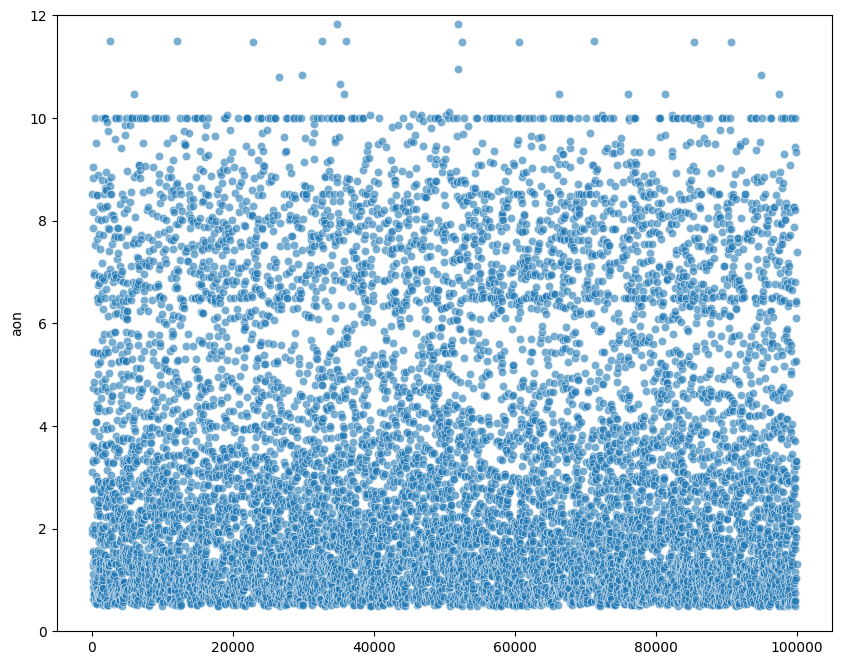

In [279]:
#Analysing age on network of the customers column, we can see that, the highest concentration for the customers is less than 4 years, which means that they were with the service provider for less than 4 years.
plt.figure(figsize=(10,8))
sns.scatterplot(y=tele_copy['aon'] / 365, x=tele_copy.index, alpha=0.6)
plt.ylim(0,12)
plt.show()

In [280]:
tele_copy.head(10)

,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,t_rechargedataamt_jun_6,t_rechargedataamt_jul_7,t_rechargedataamt_aug_8,comb_usemins_6,comb_usemins_7,comb_usemins_8,comb_usemins_9
33,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,0.00,...,2706.83,1714.67,0.0,5285.0,20424.0,455.0,0.00,0.00,0.00,0.00
53,978.077,1141.296,706.020,1076.247,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,344.0,575.0,23.0,614.45,662.77,364.03,503.06
56,452.624,320.548,368.807,281.710,0.00,0.00,0.00,0.00,0.00,0.00,...,535.63,1459.45,0.0,616.0,3600.0,6400.0,166.05,133.72,134.92,124.52
57,1201.298,687.704,602.052,1529.608,0.00,0.00,0.00,0.00,0.00,0.00,...,3649.39,1892.32,0.0,5244.0,655.0,455.0,226.64,218.70,230.90,325.33
61,565.516,390.307,430.911,368.777,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,358.0,154.0,154.0,365.09,271.89,315.19,257.12
92,465.794,530.596,463.903,523.638,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,98.0,392.0,392.0,551.54,358.19,361.05,515.67
101,512.524,402.001,1144.254,1180.985,91.03,188.34,73.19,103.58,306.66,224.48,...,0.00,0.00,0.0,125.0,154.0,1356.0,537.82,346.29,567.44,597.62
102,451.375,324.314,324.050,191.264,0.00,6.43,0.00,0.00,0.00,9.89,...,0.00,0.00,0.0,154.0,198.0,368.0,495.02,529.94,551.41,288.38
104,143.313,80.257,118.036,185.673,0.00,0.00,0.00,0.00,11.18,0.00,...,103.13,292.58,0.0,548.0,432.0,560.0,14.74,0.00,0.00,0.00
105,659.587,398.875,621.127,688.654,0.00,0.00,0.00,0.00,0.00,0.00,...,6.46,0.00,0.0,252.0,145.0,404.0,1181.13,693.02,900.79,495.29


In [281]:
#Dropping further unnecessary columns

tele_copy['good_vbc3g'] = (tele_copy['jul_vbc_3g'] + tele_copy['jun_vbc_3g'] ) / 2

tele_copy.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

#rename aug vbc 3g column
tele_copy['aug_vbc_3g'] = tele_copy['aug_vbc_3g']
tele_copy.drop('aug_vbc_3g', axis=1, inplace=True)

tele_copy.head()


,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,...,fb_user_8,aon,t_rechargedataamt_jun_6,t_rechargedataamt_jul_7,t_rechargedataamt_aug_8,comb_usemins_6,comb_usemins_7,comb_usemins_8,comb_usemins_9,good_vbc3g
33,977.020,2362.833,409.230,799.356,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1328,5285.0,20424.0,455.0,0.00,0.00,0.00,0.00,2210.750
53,978.077,1141.296,706.020,1076.247,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,697,344.0,575.0,23.0,614.45,662.77,364.03,503.06,0.000
56,452.624,320.548,368.807,281.710,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,729,616.0,3600.0,6400.0,166.05,133.72,134.92,124.52,997.540
57,1201.298,687.704,602.052,1529.608,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3106,5244.0,655.0,455.0,226.64,218.70,230.90,325.33,2770.855
61,565.516,390.307,430.911,368.777,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1131,358.0,154.0,154.0,365.09,271.89,315.19,257.12,0.000


In [282]:
tele_copy.reset_index(inplace=True, drop=True)
tele_copy.head()

,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,...,fb_user_8,aon,t_rechargedataamt_jun_6,t_rechargedataamt_jul_7,t_rechargedataamt_aug_8,comb_usemins_6,comb_usemins_7,comb_usemins_8,comb_usemins_9,good_vbc3g
0,977.020,2362.833,409.230,799.356,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1328,5285.0,20424.0,455.0,0.00,0.00,0.00,0.00,2210.750
1,978.077,1141.296,706.020,1076.247,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,697,344.0,575.0,23.0,614.45,662.77,364.03,503.06,0.000
2,452.624,320.548,368.807,281.710,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,729,616.0,3600.0,6400.0,166.05,133.72,134.92,124.52,997.540
3,1201.298,687.704,602.052,1529.608,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3106,5244.0,655.0,455.0,226.64,218.70,230.90,325.33,2770.855
4,565.516,390.307,430.911,368.777,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1131,358.0,154.0,154.0,365.09,271.89,315.19,257.12,0.000


In [283]:
tele_copy.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,...,fb_user_8,aon,t_rechargedataamt_jun_6,t_rechargedataamt_jul_7,t_rechargedataamt_aug_8,comb_usemins_6,comb_usemins_7,comb_usemins_8,comb_usemins_9,good_vbc3g
count,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,...,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000
mean,509.952599,517.540099,509.992564,482.179266,12.573634,9.899212,11.173683,10.153338,16.465809,11.751526,...,0.950697,1250.437194,971.586800,1141.857894,1069.843256,400.459839,407.045200,396.696592,374.726777,331.374750
std,384.625451,404.428104,413.801014,416.176224,65.685774,74.091702,78.577518,65.866303,85.802191,64.885190,...,0.216511,970.318691,1882.719222,2123.970308,2516.843751,544.436095,565.280193,560.797005,531.104049,532.923881
min,0.000000,-42.714000,-11.120000,-43.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,180.000000,1.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,261.099000,261.485000,239.276000,213.914000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,466.000000,154.000000,198.000000,164.000000,62.520000,57.280000,54.840000,49.750000,0.000000
50%,418.140000,411.394000,408.454000,378.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,898.000000,449.000000,608.000000,400.000000,227.880000,221.500000,214.240000,198.270000,115.670000
75%,638.835000,652.498000,644.076000,626.177000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1901.000000,1008.000000,1225.000000,1008.000000,531.170000,535.130000,522.240000,489.830000,463.570000
max,4140.283000,6256.564000,6255.086000,7176.047000,2613.310000,2933.080000,4169.810000,1639.530000,3775.110000,1636.610000,...,1.000000,4321.000000,55296.000000,55080.000000,89106.500000,7148.470000,8235.710000,10881.650000,9103.380000,8190.585000


In [284]:
#Analysing the 9th month data using the Incoming, Outgoing and Volume columns data.
col_9 = [col for col in all_cols if '9' in col]

col_9_ic = [col for col in col_9 if 'ic' in col and 'mou' in col]

col_9_og = [col for col in col_9 if 'oc' in col and 'mou' in col]

col_9_vol = [col for col in col_9 if 'vol' in col and 'mb' in col]

tele_copy['sum_ic'] = tele[col_9_ic].sum(axis = 1)

tele_copy['sum_og'] = tele[col_9_og].sum(axis = 1)

tele_copy['sum_vol'] = tele[col_9_vol].sum(axis = 1)


In [285]:
tele_col = ['sum_ic', 'sum_og', 'sum_vol']
tele_copy['tele_1'] = tele_copy[tele_col].sum(axis = 1)
tele_copy.head(15)

,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,...,t_rechargedataamt_aug_8,comb_usemins_6,comb_usemins_7,comb_usemins_8,comb_usemins_9,good_vbc3g,sum_ic,sum_og,sum_vol,tele_1
0,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,0.00,...,455.0,0.00,0.00,0.00,0.00,2210.750,0.00,0.00,0.00,0.00
1,978.077,1141.296,706.020,1076.247,0.00,0.00,0.00,0.00,0.00,0.00,...,23.0,614.45,662.77,364.03,503.06,0.000,564.11,490.26,0.00,1054.37
2,452.624,320.548,368.807,281.710,0.00,0.00,0.00,0.00,0.00,0.00,...,6400.0,166.05,133.72,134.92,124.52,997.540,1590.47,820.89,8.42,2419.78
3,1201.298,687.704,602.052,1529.608,0.00,0.00,0.00,0.00,0.00,0.00,...,455.0,226.64,218.70,230.90,325.33,2770.855,913.95,486.41,0.00,1400.36
4,565.516,390.307,430.911,368.777,0.00,0.00,0.00,0.00,0.00,0.00,...,154.0,365.09,271.89,315.19,257.12,0.000,615.72,602.82,0.00,1218.54
5,465.794,530.596,463.903,523.638,0.00,0.00,0.00,0.00,0.00,0.00,...,392.0,551.54,358.19,361.05,515.67,0.000,614.76,676.19,0.00,1290.95
6,512.524,402.001,1144.254,1180.985,91.03,188.34,73.19,103.58,306.66,224.48,...,1356.0,537.82,346.29,567.44,597.62,0.000,7717.46,5276.09,0.00,12993.55
7,451.375,324.314,324.050,191.264,0.00,6.43,0.00,0.00,0.00,9.89,...,368.0,495.02,529.94,551.41,288.38,0.000,0.00,0.00,0.00,0.00
8,143.313,80.257,118.036,185.673,0.00,0.00,0.00,0.00,11.18,0.00,...,560.0,14.74,0.00,0.00,0.00,197.855,104.72,164.17,0.00,268.89
9,659.587,398.875,621.127,688.654,0.00,0.00,0.00,0.00,0.00,0.00,...,404.0,1181.13,693.02,900.79,495.29,3.230,1209.73,888.06,0.00,2097.79


In [287]:
tele_copy['tele_1'] = tele_copy['tele_1'].apply(lambda x: 0 if x > 0 else 1)
tele_copy.head()


,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,...,t_rechargedataamt_aug_8,comb_usemins_6,comb_usemins_7,comb_usemins_8,comb_usemins_9,good_vbc3g,sum_ic,sum_og,sum_vol,tele_1
0,977.020,2362.833,409.230,799.356,0.0,0.0,0.0,0.0,0.0,0.0,...,455.0,0.00,0.00,0.00,0.00,2210.750,0.00,0.00,0.00,0
1,978.077,1141.296,706.020,1076.247,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,614.45,662.77,364.03,503.06,0.000,564.11,490.26,0.00,1
2,452.624,320.548,368.807,281.710,0.0,0.0,0.0,0.0,0.0,0.0,...,6400.0,166.05,133.72,134.92,124.52,997.540,1590.47,820.89,8.42,1
3,1201.298,687.704,602.052,1529.608,0.0,0.0,0.0,0.0,0.0,0.0,...,455.0,226.64,218.70,230.90,325.33,2770.855,913.95,486.41,0.00,1
4,565.516,390.307,430.911,368.777,0.0,0.0,0.0,0.0,0.0,0.0,...,154.0,365.09,271.89,315.19,257.12,0.000,615.72,602.82,0.00,1


In [288]:
tele_copy.tele_1.value_counts(normalize=True)
#Values greater than zero indicate the active users.

1    0.920135
0    0.079865
Name: tele_1, dtype: float64

In [289]:
tele_copy.describe

<bound method NDFrame.describe of          arpu_6    arpu_7   arpu_8    arpu_9  roam_ic_mou_6  roam_ic_mou_7  \
0       977.020  2362.833  409.230   799.356           0.00           0.00   
1       978.077  1141.296  706.020  1076.247           0.00           0.00   
2       452.624   320.548  368.807   281.710           0.00           0.00   
3      1201.298   687.704  602.052  1529.608           0.00           0.00   
4       565.516   390.307  430.911   368.777           0.00           0.00   
...         ...       ...      ...       ...            ...            ...   
10400  1090.075   659.300  974.759  1061.843           5.58           0.00   
10401   268.845   594.676  603.593  1151.274           1.01          12.09   
10402   328.594   202.966  118.707   324.143           0.00           0.00   
10403   644.973   455.228  564.334   267.451           0.00           0.00   
10404   322.991   303.386  606.817   731.010           0.00           0.00   

       roam_ic_mou_8  roam_ic

#**➡️4. Building of the Models.**#

In [290]:
#Standardizing the data and handling the classes imbalances using SM Oversampling technique.

y = tele_copy['tele_1']
X = tele_copy.drop('tele_1', axis=1)

In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [292]:
tele_copy.tele_1.value_counts()

1    9574
0     831
Name: tele_1, dtype: int64

In [293]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [294]:
y_res.value_counts()

0    9574
1    9574
Name: tele_1, dtype: int64

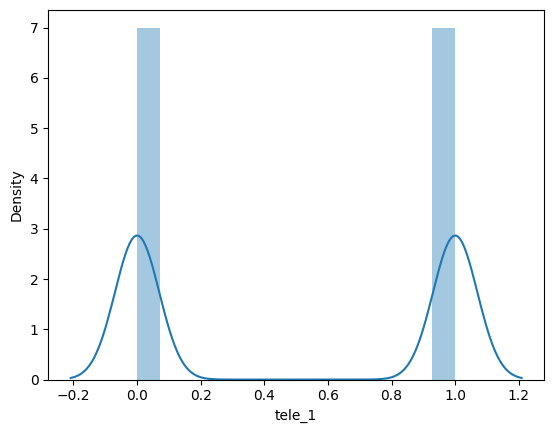

In [295]:
sns.distplot(y_res)
plt.show()

In [296]:
#Principal Component analysis
X.shape

(10405, 146)

In [297]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(19148, 25)

In [298]:
#Logistic Regression

#Splitting data into Train set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.6, test_size=0.4, random_state=42)

In [299]:
import statsmodels.api as sm

In [300]:
reg_model_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
reg_model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 tele_1   No. Observations:                11488
Model:                            GLM   Df Residuals:                    11347
Model Family:                Binomial   Df Model:                          140
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Nov 2023   Deviance:                       92196.
Time:                        08:16:43   Pearson chi2:                 4.51e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.976e+15   6.88e+05   4.33e+09      0.000    2.98e+15    2.98e+15
arpu_6                   7.908e+13   2.32e+06   3.41e+07      0.000    7.91e+13    7.91e+13
arpu_7                  -1.093e+14   2.49e+06   -4.4e+07      0.000   -1.09e+14   -1.09e+14
arpu_8                  -5.108e+13    2.7e+06  -1.89e+07      0.000   -5.11e+13   -5.11e+13
arpu_9                    5.69e+13   3.53e+06   1.61e+07      0.000    5.69e+13    5.69e+13
roam_ic_mou_6             3.34e+13   1.16e+06   2.88e+07      0.000    3.34e+13    3.34e+13
roam_ic_mou_7            1.926e+13   1.62e+06   1.19e+07      0.000    1.93e+13    1.93e+13
roam_ic_mou_8           -8.505e+12    1.3e+06  -6.52e+06      0.000   -8.51e+12   -8.51e+12
roam_ic_mou_9           -3.769e+13    1.1e+06  -3.44e+07      0.000   -3.77e+13   -3.77e+13
roam_og_mou_6           -1.293e+15   2.45e+07  -5.29e+07      0.000   -1.29e+15   -1.29e+15
roam_og_mou_7            3.464e+14   1.21e+07   2.87e+07      0.000    3.46e+14    3.46e+14
roam_og_mou_8            1.798e+14   1.37e+07   1.31e+07      0.000     1.8e+14     1.8e+14
roam_og_mou_9           -2.041e+14   1.01e+07  -2.02e+07      0.000   -2.04e+14   -2.04e+14
loc_og_t2t_mou_9        -1.571e+18   2.57e+10  -6.11e+07      0.000   -1.57e+18   -1.57e+18
loc_og_t2m_mou_9         -1.55e+18   2.54e+10  -6.11e+07      0.000   -1.55e+18   -1.55e+18
loc_og_t2f_mou_9        -1.098e+17    1.8e+09  -6.11e+07      0.000    -1.1e+17    -1.1e+17
loc_og_t2c_mou_6         2.319e+13   9.35e+05   2.48e+07      0.000    2.32e+13    2.32e+13
loc_og_t2c_mou_7        -3.968e+13   1.06e+06  -3.76e+07      0.000   -3.97e+13   -3.97e+13
loc_og_t2c_mou_8        -2.999e+13   1.09e+06  -2.75e+07      0.000      -3e+13      -3e+13
loc_og_t2c_mou_9         4.111e+13   9.51e+05   4.32e+07      0.000    4.11e+13    4.11e+13
loc_og_mou_6            -5.193e+15   1.02e+08  -5.07e+07      0.000   -5.19e+15   -5.19e+15
loc_og_mou_7             2.218e+15   6.78e+07   3.27e+07      0.000    2.22e+15    2.22e+15
loc_og_mou_8             6.191e+14   6.38e+07    9.7e+06      0.000    6.19e+14    6.19e+14
loc_og_mou_9             5.521e+18   5.53e+10   9.98e+07      0.000    5.52e+18    5.52e+18
std_og_t2t_mou_9        -3.434e+17   4.17e+10  -8.24e+06      0.000   -3.43e+17   -3.43e+17
std_og_t2m_mou_9        -3.856e+17   4.68e+10  -8.24e+06      0.000   -3.86e+17   -3.86e+17
std_og_t2f_mou_6        -1.893e+13   1.07e+06  -1.76e+07      0.000   -1.89e+13   -1.89e+13
std_og_t2f_mou_7        -1.061e+13   1.59e+06  -6.69e+06      0.000   -1.06e+13   -1.06e+13
std_og_t2f_mou_8        -1.932e+12   1.24e+06  -1.56e+06      0.000   -1.93e+12   -1.93e+12
std_og_t2f_mou_9        -1.708e+16   2.07e+09  -8.25e+06      0.000   -1.71e+16   -1.71e+16
std_og_mou_6            -5.514e+15   1.08e+08  

In [301]:
#Feature selection using Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

log_reg = LogisticRegression(solver='liblinear')

rfe = RFE(log_reg, n_features_to_select=42)
rfe = rfe.fit(X_train, y_train)

In [302]:
recufe_col = X.columns[rfe.support_]
recufe_col

Index(['arpu_6', 'arpu_7', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2f_mou_9', 'std_og_t2m_mou_9', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_9', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_9', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'spl_ic_mou_7', 'spl_ic_mou_9',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'total_rech_num_7',
       'last_day_rch_amt_8', 'count_rech_3g_6', 'count_rech_3g_8',
       'vol_2g_mb_7', 'arpu_3g_6', 'arpu_2g_7', 'arpu_2g_8',
       'night_pck_user_7', 'night_pck_user_8', 'sachet_2g_7', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_9',
       't_rechargedataamt_aug_8', 'sum_ic', 'sum_og', 'sum_vol'],
      dtype='object')

In [303]:
#Model Building with features selected by RFE
X_train_sm = sm.add_constant(X_train[recufe_col])
reg_model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = reg_model_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 tele_1   No. Observations:                11488
Model:                            GLM   Df Residuals:                    11445
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Nov 2023   Deviance:                   1.0804e+05
Time:                        08:18:55   Pearson chi2:                 5.28e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.399e+15   6.83e+05   3.51e+09      0.000     2.4e+15     2.4e+15
arpu_6                   1.421e+14   1.41e+06   1.01e+08      0.000    1.42e+14    1.42e+14
arpu_7                  -1.211e+14   1.51e+06     -8e+07      0.000   -1.21e+14   -1.21e+14
roam_ic_mou_6           -1.438e+13   9.12e+05  -1.58e+07      0.000   -1.44e+13   -1.44e+13
roam_og_mou_6            -3.28e+13   7.47e+05  -4.39e+07      0.000   -3.28e+13   -3.28e+13
loc_og_t2f_mou_9        -1.191e+14   8.06e+05  -1.48e+08      0.000   -1.19e+14   -1.19e+14
std_og_t2m_mou_9        -4.347e+13   8.19e+05  -5.31e+07      0.000   -4.35e+13   -4.35e+13
std_og_mou_6            -9.063e+12    1.5e+06  -6.03e+06      0.000   -9.06e+12   -9.06e+12
std_og_mou_7            -3.026e+13   1.47e+06  -2.06e+07      0.000   -3.03e+13   -3.03e+13
isd_og_mou_6             -6.83e+13   1.12e+06  -6.08e+07      0.000   -6.83e+13   -6.83e+13
isd_og_mou_7             1.613e+14   1.69e+06   9.55e+07      0.000    1.61e+14    1.61e+14
isd_og_mou_9            -6.129e+13   1.28e+06  -4.78e+07      0.000   -6.13e+13   -6.13e+13
spl_og_mou_8            -6.485e+13    9.7e+05  -6.68e+07      0.000   -6.49e+13   -6.49e+13
og_others_6             -2.937e+13   7.79e+05  -3.77e+07      0.000   -2.94e+13   -2.94e+13
og_others_7             -1.615e+14   2.58e+06  -6.26e+07      0.000   -1.61e+14   -1.61e+14
og_others_9              1.797e+14   2.65e+06   6.78e+07      0.000     1.8e+14     1.8e+14
std_ic_t2t_mou_7           1.8e+13   1.48e+06   1.21e+07      0.000     1.8e+13     1.8e+13
std_ic_t2t_mou_8         4.087e+13   1.54e+06   2.65e+07      0.000    4.09e+13    4.09e+13
std_ic_t2t_mou_9        -1.557e+13   1.17e+06  -1.33e+07      0.000   -1.56e+13   -1.56e+13
spl_ic_mou_7             3.348e+13   9.93e+05   3.37e+07      0.000    3.35e+13    3.35e+13
spl_ic_mou_9            -1.361e+13   7.99e+05   -1.7e+07      0.000   -1.36e+13   -1.36e+13
isd_ic_mou_8            -3.668e+13   1.19e+06  -3.08e+07      0.000   -3.67e+13   -3.67e+13
isd_ic_mou_9             4.181e+13   1.14e+06   3.66e+07      0.000    4.18e+13    4.18e+13
ic_others_6              3.399e+13   7.74e+05   4.39e+07      0.000     3.4e+13     3.4e+13
total_rech_num_7         1.447e+14   1.07e+06   1.35e+08      0.000    1.45e+14    1.45e+14
last_day_rch_amt_8      -2.825e+13   8.44e+05  -3.35e+07      0.000   -2.83e+13   -2.83e+13
count_rech_3g_6          2.666e+12   9.91e+05   2.69e+06      0.000    2.67e+12    2.67e+12
count_rech_3g_8          3.257e+13   1.47e+06   2.22e+07      0.000    3.26e+13    3.26e+13
vol_2g_mb_7              7.503e+13   7.43e+05   1.01e+08      0.000     7.5e+13     7.5e+13
arpu_3g_6                9.444e+13   1.87e+06   5.05e+07      0.000    9.44e+13    9.44e+13
arpu_2g_7                1.569e+14   1.96e+06  

In [304]:
# Prediction on the Train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churned_customers':y_train.values, 'Churned_areas':y_train_pred})
y_train_pred_final['Predictions'] = y_train_pred_final.Churned_areas.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churned_customers,Churned_areas,Predictions
0,1,1.0,1
1,1,0.0,0
2,1,1.0,1
3,1,1.0,1
4,1,0.0,0


In [306]:
#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churned_customers, y_train_pred_final.Predictions)
print(confusion)

[[5547  230]
 [ 943 4768]]


In [307]:
#Accuracy derivation
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churned_customers, y_train_pred_final.Predictions)}')

Accuracy : 0.8978934540389972


In [308]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [309]:
vif = pd.DataFrame()
vif['Features'] = X_train[recufe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[recufe_col].values, i) for i in range(X_train[recufe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,arpu_2g_8,11.19
29,arpu_2g_7,9.55
36,monthly_3g_8,8.56
28,arpu_3g_6,8.46
35,monthly_3g_7,8.11
34,monthly_3g_6,5.73
1,arpu_7,5.13
7,std_og_mou_7,4.85
0,arpu_6,4.76
6,std_og_mou_6,4.51


In [310]:
#Dropping columns with High VIF
#arpu_2g_8	11.19
#arpu_2g_7	9.55
#monthly_3g_8	8.56
#arpu_3g_6	8.46


recufe_col = recufe_col.drop('arpu_2g_8', 1)
recufe_col = recufe_col.drop('arpu_2g_7', 1)
recufe_col = recufe_col.drop('monthly_3g_8', 1)
recufe_col = recufe_col.drop('arpu_3g_6', 1)

In [311]:
#New Model
X_train_sm = sm.add_constant(X_train[recufe_col])
reg_model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = reg_model_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 tele_1   No. Observations:                11488
Model:                            GLM   Df Residuals:                    11449
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Nov 2023   Deviance:                       82064.
Time:                        08:21:31   Pearson chi2:                 4.01e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.478e+15   6.82e+05   3.63e+09      0.000    2.48e+15    2.48e+15
arpu_6                  -1.042e+14    1.3e+06  -8.01e+07      0.000   -1.04e+14   -1.04e+14
arpu_7                   1.184e+14   1.45e+06   8.19e+07      0.000    1.18e+14    1.18e+14
roam_ic_mou_6              9.6e+13   9.12e+05   1.05e+08      0.000     9.6e+13     9.6e+13
roam_og_mou_6             -4.9e+13   7.43e+05  -6.59e+07      0.000    -4.9e+13    -4.9e+13
loc_og_t2f_mou_9         1.469e+13   8.03e+05   1.83e+07      0.000    1.47e+13    1.47e+13
std_og_t2m_mou_9         2.327e+13   8.18e+05   2.84e+07      0.000    2.33e+13    2.33e+13
std_og_mou_6             1.724e+13   1.49e+06   1.16e+07      0.000    1.72e+13    1.72e+13
std_og_mou_7            -7.418e+13   1.46e+06  -5.09e+07      0.000   -7.42e+13   -7.42e+13
isd_og_mou_6            -3.788e+13   1.12e+06  -3.38e+07      0.000   -3.79e+13   -3.79e+13
isd_og_mou_7             1.179e+14   1.68e+06      7e+07      0.000    1.18e+14    1.18e+14
isd_og_mou_9            -3.805e+13   1.28e+06  -2.97e+07      0.000   -3.81e+13   -3.81e+13
spl_og_mou_8            -2.027e+13   9.69e+05  -2.09e+07      0.000   -2.03e+13   -2.03e+13
og_others_6              6.314e+13   7.79e+05   8.11e+07      0.000    6.31e+13    6.31e+13
og_others_7              -7.16e+13   2.58e+06  -2.77e+07      0.000   -7.16e+13   -7.16e+13
og_others_9              1.177e+14   2.65e+06   4.44e+07      0.000    1.18e+14    1.18e+14
std_ic_t2t_mou_7         6.062e+13   1.48e+06   4.09e+07      0.000    6.06e+13    6.06e+13
std_ic_t2t_mou_8         2.446e+13   1.54e+06   1.59e+07      0.000    2.45e+13    2.45e+13
std_ic_t2t_mou_9        -5.168e+13   1.17e+06  -4.41e+07      0.000   -5.17e+13   -5.17e+13
spl_ic_mou_7             3.832e+13   9.93e+05   3.86e+07      0.000    3.83e+13    3.83e+13
spl_ic_mou_9             1.444e+13   7.99e+05   1.81e+07      0.000    1.44e+13    1.44e+13
isd_ic_mou_8            -3.879e+13   1.19e+06  -3.26e+07      0.000   -3.88e+13   -3.88e+13
isd_ic_mou_9             8.298e+13   1.14e+06   7.27e+07      0.000     8.3e+13     8.3e+13
ic_others_6              3.866e+13   7.74e+05   4.99e+07      0.000    3.87e+13    3.87e+13
total_rech_num_7         5.972e+13   1.07e+06   5.61e+07      0.000    5.97e+13    5.97e+13
last_day_rch_amt_8       8.417e+13   8.33e+05   1.01e+08      0.000    8.42e+13    8.42e+13
count_rech_3g_6          1.346e+13   8.91e+05   1.51e+07      0.000    1.35e+13    1.35e+13
count_rech_3g_8          9.586e+13   1.29e+06   7.41e+07      0.000    9.59e+13    9.59e+13
vol_2g_mb_7              2.577e+13   7.37e+05    3.5e+07      0.000    2.58e+13    2.58e+13
night_pck_user_7        -2.688e+13   1.03e+06  -2.61e+07      0.000   -2.69e+13   -2.69e+13
night_pck_user_8        -8.557e+13   1.03e+06  

In [312]:
# Prediction on the Train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churned_customers':y_train.values, 'Churned_areas':y_train_pred})
y_train_pred_final['Predictions'] = y_train_pred_final.Churned_areas.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churned_customers,Churned_areas,Predictions
0,1,1.0,1
1,1,0.0,0
2,1,1.0,1
3,1,1.0,1
4,1,0.0,0


In [313]:
#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churned_customers, y_train_pred_final.Predictions)
print(confusion)

[[5657  120]
 [ 771 4940]]


In [314]:
#Accuracy derivation
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churned_customers, y_train_pred_final.Predictions)}')

Accuracy : 0.9224408077994429


In [316]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [317]:
vif = pd.DataFrame()
vif['Features'] = X_train[recufe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[recufe_col].values, i) for i in range(X_train[recufe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,std_og_mou_7,4.79
1,arpu_7,4.68
6,std_og_mou_6,4.41
0,arpu_6,4.06
10,isd_og_mou_9,4.01
16,std_ic_t2t_mou_8,3.59
9,isd_og_mou_7,3.52
35,sum_ic,3.37
36,sum_og,3.37
8,isd_og_mou_6,3.33


In [319]:
#Dropping columns with High VIF
#std_og_mou_7	4.79
#arpu_7	4.68
#std_og_mou_6	4.41

recufe_col = recufe_col.drop('std_og_mou_7', 1)
recufe_col = recufe_col.drop('arpu_7', 1)
recufe_col = recufe_col.drop('std_og_mou_6', 1)


In [320]:
#New Model
X_train_sm = sm.add_constant(X_train[recufe_col])
reg_model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = reg_model_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 tele_1   No. Observations:                11488
Model:                            GLM   Df Residuals:                    11452
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Nov 2023   Deviance:                   1.8826e+05
Time:                        08:27:06   Pearson chi2:                 9.21e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.858e+15   6.82e+05   4.19e+09      0.000    2.86e+15    2.86e+15
arpu_6                  -8.826e+12   9.06e+05  -9.74e+06      0.000   -8.83e+12   -8.83e+12
roam_ic_mou_6            -1.46e+13   9.11e+05   -1.6e+07      0.000   -1.46e+13   -1.46e+13
roam_og_mou_6           -1.643e+13   7.27e+05  -2.26e+07      0.000   -1.64e+13   -1.64e+13
loc_og_t2f_mou_9         2.785e+13   7.94e+05   3.51e+07      0.000    2.78e+13    2.78e+13
std_og_t2m_mou_9         3.412e+13   7.27e+05   4.69e+07      0.000    3.41e+13    3.41e+13
isd_og_mou_6            -8.411e+13   1.11e+06  -7.56e+07      0.000   -8.41e+13   -8.41e+13
isd_og_mou_7             3.524e+13   1.66e+06   2.12e+07      0.000    3.52e+13    3.52e+13
isd_og_mou_9             5.281e+13   1.28e+06   4.13e+07      0.000    5.28e+13    5.28e+13
spl_og_mou_8            -1.053e+12   9.67e+05  -1.09e+06      0.000   -1.05e+12   -1.05e+12
og_others_6             -4.378e+12   7.75e+05  -5.65e+06      0.000   -4.38e+12   -4.38e+12
og_others_7             -8.273e+13   2.58e+06  -3.21e+07      0.000   -8.27e+13   -8.27e+13
og_others_9              1.152e+14   2.65e+06   4.35e+07      0.000    1.15e+14    1.15e+14
std_ic_t2t_mou_7        -1.361e+13   1.47e+06  -9.23e+06      0.000   -1.36e+13   -1.36e+13
std_ic_t2t_mou_8         2.582e+13   1.54e+06   1.68e+07      0.000    2.58e+13    2.58e+13
std_ic_t2t_mou_9        -1.901e+13   1.17e+06  -1.62e+07      0.000    -1.9e+13    -1.9e+13
spl_ic_mou_7              3.84e+12   9.93e+05   3.87e+06      0.000    3.84e+12    3.84e+12
spl_ic_mou_9             9.656e+10   7.98e+05   1.21e+05      0.000    9.66e+10    9.66e+10
isd_ic_mou_8            -3.492e+13   1.19e+06  -2.93e+07      0.000   -3.49e+13   -3.49e+13
isd_ic_mou_9             7.515e+12   1.14e+06   6.58e+06      0.000    7.51e+12    7.51e+12
ic_others_6             -5.214e+12   7.74e+05  -6.74e+06      0.000   -5.21e+12   -5.21e+12
total_rech_num_7        -1.507e+13   9.73e+05  -1.55e+07      0.000   -1.51e+13   -1.51e+13
last_day_rch_amt_8      -4.706e+13   8.11e+05  -5.81e+07      0.000   -4.71e+13   -4.71e+13
count_rech_3g_6         -1.014e+13   8.88e+05  -1.14e+07      0.000   -1.01e+13   -1.01e+13
count_rech_3g_8          1.948e+13   1.29e+06   1.51e+07      0.000    1.95e+13    1.95e+13
vol_2g_mb_7             -6.355e+13   7.34e+05  -8.66e+07      0.000   -6.36e+13   -6.36e+13
night_pck_user_7         8.225e+12   1.03e+06      8e+06      0.000    8.23e+12    8.23e+12
night_pck_user_8         1.306e+13   1.03e+06   1.27e+07      0.000    1.31e+13    1.31e+13
sachet_2g_7              -8.19e+13   9.59e+05  -8.54e+07      0.000   -8.19e+13   -8.19e+13
monthly_3g_6             3.998e+13   1.05e+06   3.81e+07      0.000       4e+13       4e+13
monthly_3g_7             -1.73e+14    9.7e+05  

In [321]:
# Prediction on the Train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churned_customers':y_train.values, 'Churned_areas':y_train_pred})
y_train_pred_final['Predictions'] = y_train_pred_final.Churned_areas.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churned_customers,Churned_areas,Predictions
0,1,1.0,1
1,1,1.0,1
2,1,1.0,1
3,1,1.0,1
4,1,1.0,1


In [322]:
#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churned_customers, y_train_pred_final.Predictions)
print(confusion)

[[4016 1761]
 [ 283 5428]]


In [323]:
#Accuracy derivation
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churned_customers, y_train_pred_final.Predictions)}')

Accuracy : 0.822075208913649


In [324]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [325]:
vif = pd.DataFrame()
vif['Features'] = X_train[recufe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[recufe_col].values, i) for i in range(X_train[recufe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,isd_og_mou_9,4.00
13,std_ic_t2t_mou_8,3.59
6,isd_og_mou_7,3.41
33,sum_og,3.37
32,sum_ic,3.37
5,isd_og_mou_6,3.28
23,count_rech_3g_8,3.23
12,std_ic_t2t_mou_7,3.01
28,monthly_3g_6,2.72
14,std_ic_t2t_mou_9,2.48


In [326]:
#Dropping column with High VIF
#isd_og_mou_9	4.00

recufe_col = recufe_col.drop('isd_og_mou_9', 1)

In [327]:
#New Model
X_train_sm = sm.add_constant(X_train[recufe_col])
reg_model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = reg_model_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 tele_1   No. Observations:                11488
Model:                            GLM   Df Residuals:                    11453
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Nov 2023   Deviance:                   1.3189e+05
Time:                        08:29:34   Pearson chi2:                 6.45e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.908e+15   6.81e+05   4.27e+09      0.000    2.91e+15    2.91e+15
arpu_6                   -1.75e+13   9.06e+05  -1.93e+07      0.000   -1.75e+13   -1.75e+13
roam_ic_mou_6            1.967e+13   9.11e+05   2.16e+07      0.000    1.97e+13    1.97e+13
roam_og_mou_6           -4.826e+13   7.27e+05  -6.64e+07      0.000   -4.83e+13   -4.83e+13
loc_og_t2f_mou_9        -1.368e+12   7.94e+05  -1.72e+06      0.000   -1.37e+12   -1.37e+12
std_og_t2m_mou_9         3.088e+13   7.27e+05   4.25e+07      0.000    3.09e+13    3.09e+13
isd_og_mou_6            -6.098e+13   9.89e+05  -6.16e+07      0.000    -6.1e+13    -6.1e+13
isd_og_mou_7             1.057e+14   1.38e+06   7.64e+07      0.000    1.06e+14    1.06e+14
spl_og_mou_8              6.41e+12   9.67e+05   6.63e+06      0.000    6.41e+12    6.41e+12
og_others_6              4.055e+13   7.75e+05   5.23e+07      0.000    4.05e+13    4.05e+13
og_others_7             -8.404e+13   2.58e+06  -3.26e+07      0.000    -8.4e+13    -8.4e+13
og_others_9              1.471e+14   2.65e+06   5.56e+07      0.000    1.47e+14    1.47e+14
std_ic_t2t_mou_7         4.431e+13   1.47e+06      3e+07      0.000    4.43e+13    4.43e+13
std_ic_t2t_mou_8         1.835e+13   1.54e+06   1.19e+07      0.000    1.84e+13    1.84e+13
std_ic_t2t_mou_9        -2.171e+13   1.17e+06  -1.85e+07      0.000   -2.17e+13   -2.17e+13
spl_ic_mou_7             3.196e+13   9.93e+05   3.22e+07      0.000     3.2e+13     3.2e+13
spl_ic_mou_9             6.602e+12   7.98e+05   8.27e+06      0.000     6.6e+12     6.6e+12
isd_ic_mou_8            -4.445e+13   1.19e+06  -3.74e+07      0.000   -4.45e+13   -4.45e+13
isd_ic_mou_9             6.622e+13   1.14e+06    5.8e+07      0.000    6.62e+13    6.62e+13
ic_others_6              2.624e+13   7.74e+05   3.39e+07      0.000    2.62e+13    2.62e+13
total_rech_num_7        -2.548e+13   9.73e+05  -2.62e+07      0.000   -2.55e+13   -2.55e+13
last_day_rch_amt_8       3.285e+13    8.1e+05   4.05e+07      0.000    3.28e+13    3.28e+13
count_rech_3g_6         -7.351e+12   8.88e+05  -8.28e+06      0.000   -7.35e+12   -7.35e+12
count_rech_3g_8          2.167e+13   1.29e+06   1.68e+07      0.000    2.17e+13    2.17e+13
vol_2g_mb_7              4.272e+13   7.34e+05   5.82e+07      0.000    4.27e+13    4.27e+13
night_pck_user_7         2.785e+13   1.03e+06   2.71e+07      0.000    2.78e+13    2.78e+13
night_pck_user_8          -3.7e+13   1.03e+06  -3.59e+07      0.000    -3.7e+13    -3.7e+13
sachet_2g_7              -4.76e+12   9.59e+05  -4.96e+06      0.000   -4.76e+12   -4.76e+12
monthly_3g_6            -4.147e+13   1.05e+06  -3.95e+07      0.000   -4.15e+13   -4.15e+13
monthly_3g_7             3.864e+13    9.7e+05   3.98e+07      0.000    3.86e+13    3.86e+13
sachet_3g_9              2.489e+13   1.05e+06  

In [328]:
# Prediction on the Train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churned_customers':y_train.values, 'Churned_areas':y_train_pred})
y_train_pred_final['Predictions'] = y_train_pred_final.Churned_areas.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churned_customers,Churned_areas,Predictions
0,1,1.0,1
1,1,1.0,1
2,1,1.0,1
3,1,1.0,1
4,1,0.0,0


In [329]:
#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churned_customers, y_train_pred_final.Predictions)
print(confusion)

[[4492 1285]
 [ 147 5564]]


In [330]:
#Accuracy derivation
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churned_customers, y_train_pred_final.Predictions)}')

Accuracy : 0.8753481894150418


In [331]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [332]:
vif = pd.DataFrame()
vif['Features'] = X_train[recufe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[recufe_col].values, i) for i in range(X_train[recufe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,std_ic_t2t_mou_8,3.58
32,sum_og,3.37
31,sum_ic,3.37
22,count_rech_3g_8,3.23
11,std_ic_t2t_mou_7,3.01
27,monthly_3g_6,2.72
5,isd_og_mou_6,2.59
13,std_ic_t2t_mou_9,2.48
6,isd_og_mou_7,2.37
28,monthly_3g_7,2.33


In [ ]:
#The VIF values look fine.

In [333]:
TP = confusion[1,1] #True positives
TN = confusion[0,0] #True negatives
FP = confusion[0,1] #False positives
FN = confusion[1,0] #False negatives

#Sensitivity of the LR model
TP / float(TP+FN)

0.9742601996147785

In [334]:
#Specificity
TN / float(TN+FP)

0.7775662108360741

In [335]:
#False positives
FP/ float(TN+FP)

0.22243378916392592

In [336]:
#True Positives
TP / float(TP+FP)

0.812381369542999

In [337]:
#True Negatives
TN / float(TN+ FN)

0.9683121362362578

In [338]:
#Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [339]:
from sklearn.tree import DecisionTreeClassifier

In [340]:
#Classifiers initiation
intial_tele = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_tele.fit(X_train, y_train)

#Train Accuracy
y_train_pred = intial_tele.predict(X_train)
print(f'Train_accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_tele.predict(X_test)


print(metrics.classification_report(y_test, y_test_pred))

Train_accuracy : 0.915765127210326
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2906
           1       0.89      0.76      0.82      2839

    accuracy                           0.84      5745
   macro avg       0.84      0.83      0.83      5745
weighted avg       0.84      0.84      0.83      5745



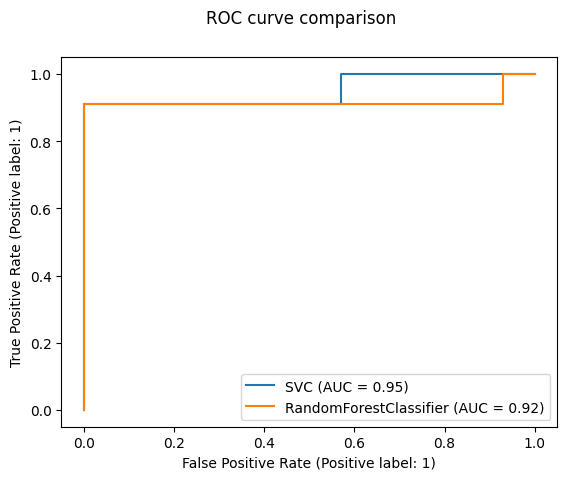

In [358]:
#ROC Curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [365]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

dectree = DecisionTreeClassifier(random_state=42)

#Parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [367]:
grid_search.best_score_

0.9064327485380116

In [368]:
best_dectree = grid_search.best_estimator_
best_dectree

DecisionTreeClassifier(max_depth=2, min_samples_leaf=25, random_state=42)

In [369]:
y_train_pred = best_dectree.predict(X_train)
y_test_pred = best_dectree.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



In [ ]:
#The Accuracy is 96%.

In [388]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier

rnf = RandomForestClassifier(n_estimators=10, max_depth=10, max_features=5, random_state=18, oob_score=True)
rnf.fit(X_train, y_train)

y_train_pred = rnf.predict(X_train)

# Train Accuracy
y_train_pred = rnf.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rnf.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))


Train accuracy : 0.9866666666666667
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.90      0.75      0.82        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



In [389]:
#Hyperparameter tuning
rnf = RandomForestClassifier(random_state=25, n_jobs=-1)

#Parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rnf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [390]:
grid_search.best_score_

0.9334795321637426

In [391]:
rnf_best = grid_search.best_estimator_
rnf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [393]:
y_train_pred = rnf_best.predict(X_train)
y_test_pred = rnf_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [ ]:
#The Accuracy is 92%.

In [398]:
fin_rf = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1, random_state=25)

In [399]:
y_train_pred = rnf_best.predict(X_train)
y_test_pred = rnf_best.predict(X_test)

print("Train data result")
print(metrics.classification_report(y_train, y_train_pred))

print("Test data result")
print(metrics.classification_report(y_test, y_test_pred))

Train data result
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.97      0.92      0.95        38

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

Test data result
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [ ]:
#The final Random forests train and test data accuracy is 95% and 92% respectively.